### Assignment No. 2 - Supervised Learning

<img src="../docs/intro.webp" alt="titanic" style="width:700px;"/>

## Introduction

The RMS Titanic dataset is a classic example used in data science and machine learning to explore factors influencing survival rates during the tragic sinking of the Titanic. The objective is to build predictive models that can accurately determine whether a passenger survived or not based on various attributes such as socio-economic status, age, gender, and more.

In this supervised learning task, we aim to develop and compare machine learning algorithms to predict survival outcomes using historical passenger data. By leveraging techniques like decision trees, neural networks, and support vector machines, we will analyze and evaluate the effectiveness of these models in classifying passengers into survival categories.

Through this exercise, we seek to gain insights into the factors that contributed significantly to survival during this historical event, demonstrating the practical application of supervised learning techniques in understanding complex real-world scenarios.

[Titanic Problem Kaggle Page](https://www.kaggle.com/datasets/sakshisatre/titanic-dataset?resource=download)

## Importing libraries

We firstly need to install the libraries we will use in this project.

To do so, run the following command in the terminal (make sure you are in the project's root directory):

```pip install -r requirements.txt```

Then, we can import the libraries we will use in this project.

We also disable the warnings, to make the notebook cleaner.

In [915]:
import warnings # Needed to ignore warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE


warnings.filterwarnings('ignore')

## Create a dataframe with the dataset from the csv file

In [916]:
df = pd.read_csv('../dataset/Titanic Dataset.csv')

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Meaning of the columns:

- Pclass: Ticket class indicating the socio-economic status of the passenger. It is categorized into three classes: 1 = Upper, 2 = Middle, 3 = Lower.

- Survived: A binary indicator that shows whether the passenger survived (1) or not (0) during the Titanic disaster. This is the target variable for analysis.

- Name: The full name of the passenger, including title (e.g., Mr., Mrs., etc.).

- Sex: The gender of the passenger, denoted as either male or female.

- Age: The age of the passenger in years.

- SibSp: The number of siblings or spouses aboard the Titanic for the respective passenger.

- Parch: The number of parents or children aboard the Titanic for the respective passenger.

- Ticket: The ticket number assigned to the passenger.

- Fare: The fare paid by the passenger for the ticket.

- Cabin: The cabin number assigned to the passenger, if available.

- Embarked: The port of embarkation for the passenger. It can take one of three values: C = Cherbourg, Q = Queenstown, S = Southampton.

- Boat: If the passenger survived, this column contains the identifier of the lifeboat they were rescued in.

- Body: If the passenger did not survive, this column contains the identification number of their recovered body, if applicable.

- Home.dest: The destination or place of residence of the passenger.

## Data preprocessing


In [917]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [918]:
# Check missing values
df.isna().any()

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

In [919]:
import matplotlib.pyplot  as plt
import seaborn as sns

In [920]:
def count_pie(dataframe,column):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.countplot(data=dataframe,x=column)
    plt.subplot(1,2,2)
    plt.pie(x=dataframe[column].value_counts().values,labels=dataframe[column].value_counts().index,autopct='%.2f')
    plt.show()

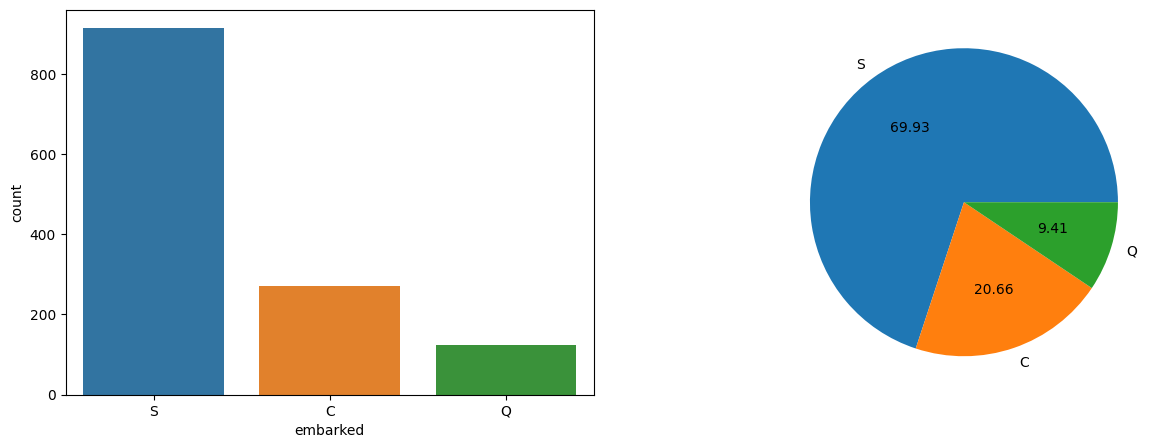

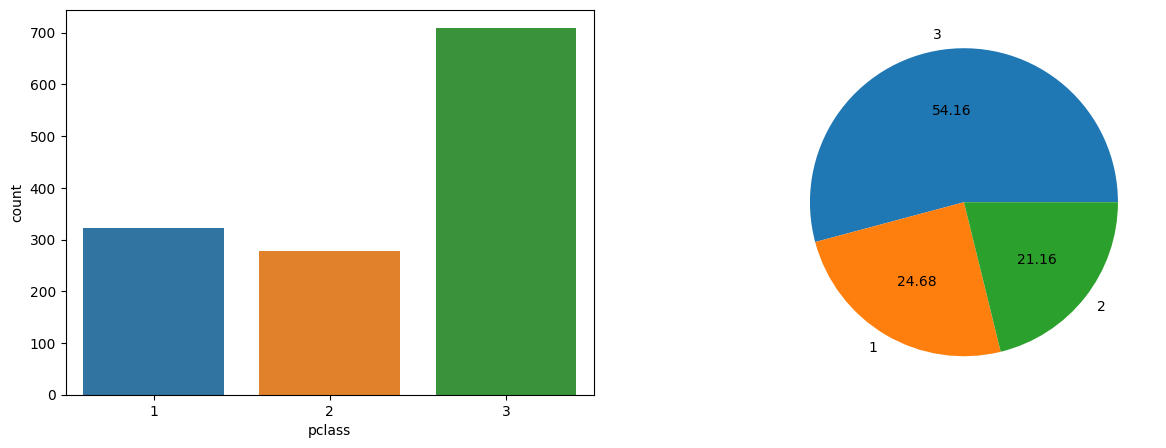

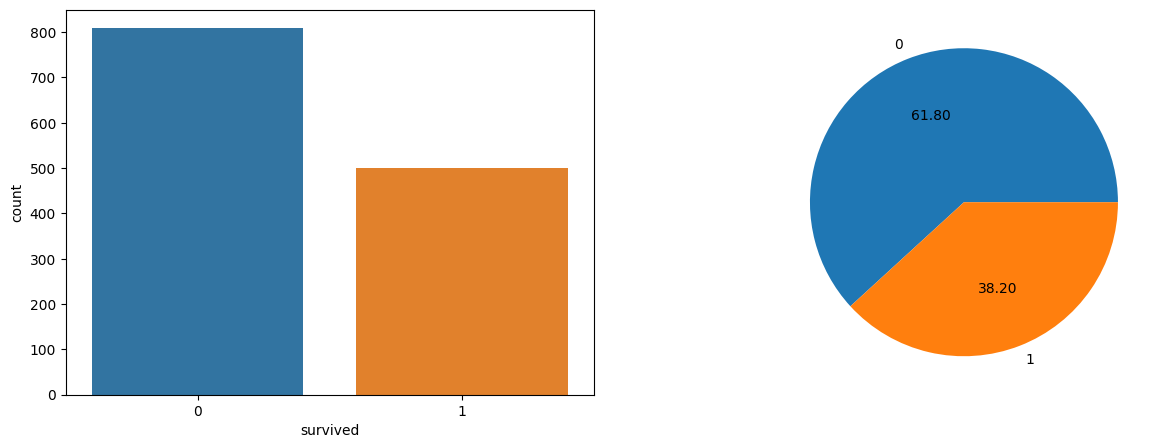

In [921]:
count_pie(dataframe=df ,column='embarked')
count_pie(dataframe=df ,column='pclass')
count_pie(dataframe=df ,column='survived')

### Filtering out outliers

In [922]:
# dropping columns, id doesn't have any significance and Unnamed: 32 has all null values
df = df.drop(columns=['body', 'boat', 'name', 'cabin', 'home.dest', "ticket"])

df.shape

(1309, 8)

### Encode the target variable
We need to encode the target variable, so that we can use it in our models, since it is currently object type.

In [923]:
encoder = LabelEncoder()

df['survived'] = encoder.fit_transform(df['survived'])
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S


Solving NaN Values

In [924]:
# Calculate the mean age for men and women separately
mean_age_male = df[df['sex'] == 'male']['age'].mean()
mean_age_female = df[df['sex'] == 'female']['age'].mean()

# Replace missing values in the 'age' column based on gender
df.loc[(df['sex'] == 'male') & (df['age'].isnull()), 'age'] = mean_age_male
df.loc[(df['sex'] == 'female') & (df['age'].isnull()), 'age'] = mean_age_female

In [925]:
df['co_pas'] = df.sibsp + df.parch
df = df.drop(columns=['sibsp','parch'])

In [926]:
dumm_data = pd.get_dummies(df['sex'],dtype='int')
df = pd.concat([df,dumm_data],axis=1)

dumm_data_em = pd.get_dummies(df['embarked'],dtype='int')
df = pd.concat([df,dumm_data_em],axis=1)
df.head()

,pclass,survived,sex,age,fare,embarked,co_pas,female,male,C,Q,S
0,1,1,female,29.00,211.3375,S,0,1,0,0,0,1
1,1,1,male,0.92,151.5500,S,3,0,1,0,0,1
2,1,0,female,2.00,151.5500,S,3,1,0,0,0,1
3,1,0,male,30.00,151.5500,S,3,0,1,0,0,1
4,1,0,female,25.00,151.5500,S,3,1,0,0,0,1


In [927]:
df = df.drop(columns=['sex','embarked'],axis=1)



In [928]:
import math
def box(dataframe,columns):
    r = math.ceil(len(columns)/3)
    plt.figure(figsize=(15,5*r))
    i = 0
    for column in columns:
        i+=1
        plt.subplot(r,3,i)
        sns.boxplot(data=dataframe,x=column)
        
    plt.show()

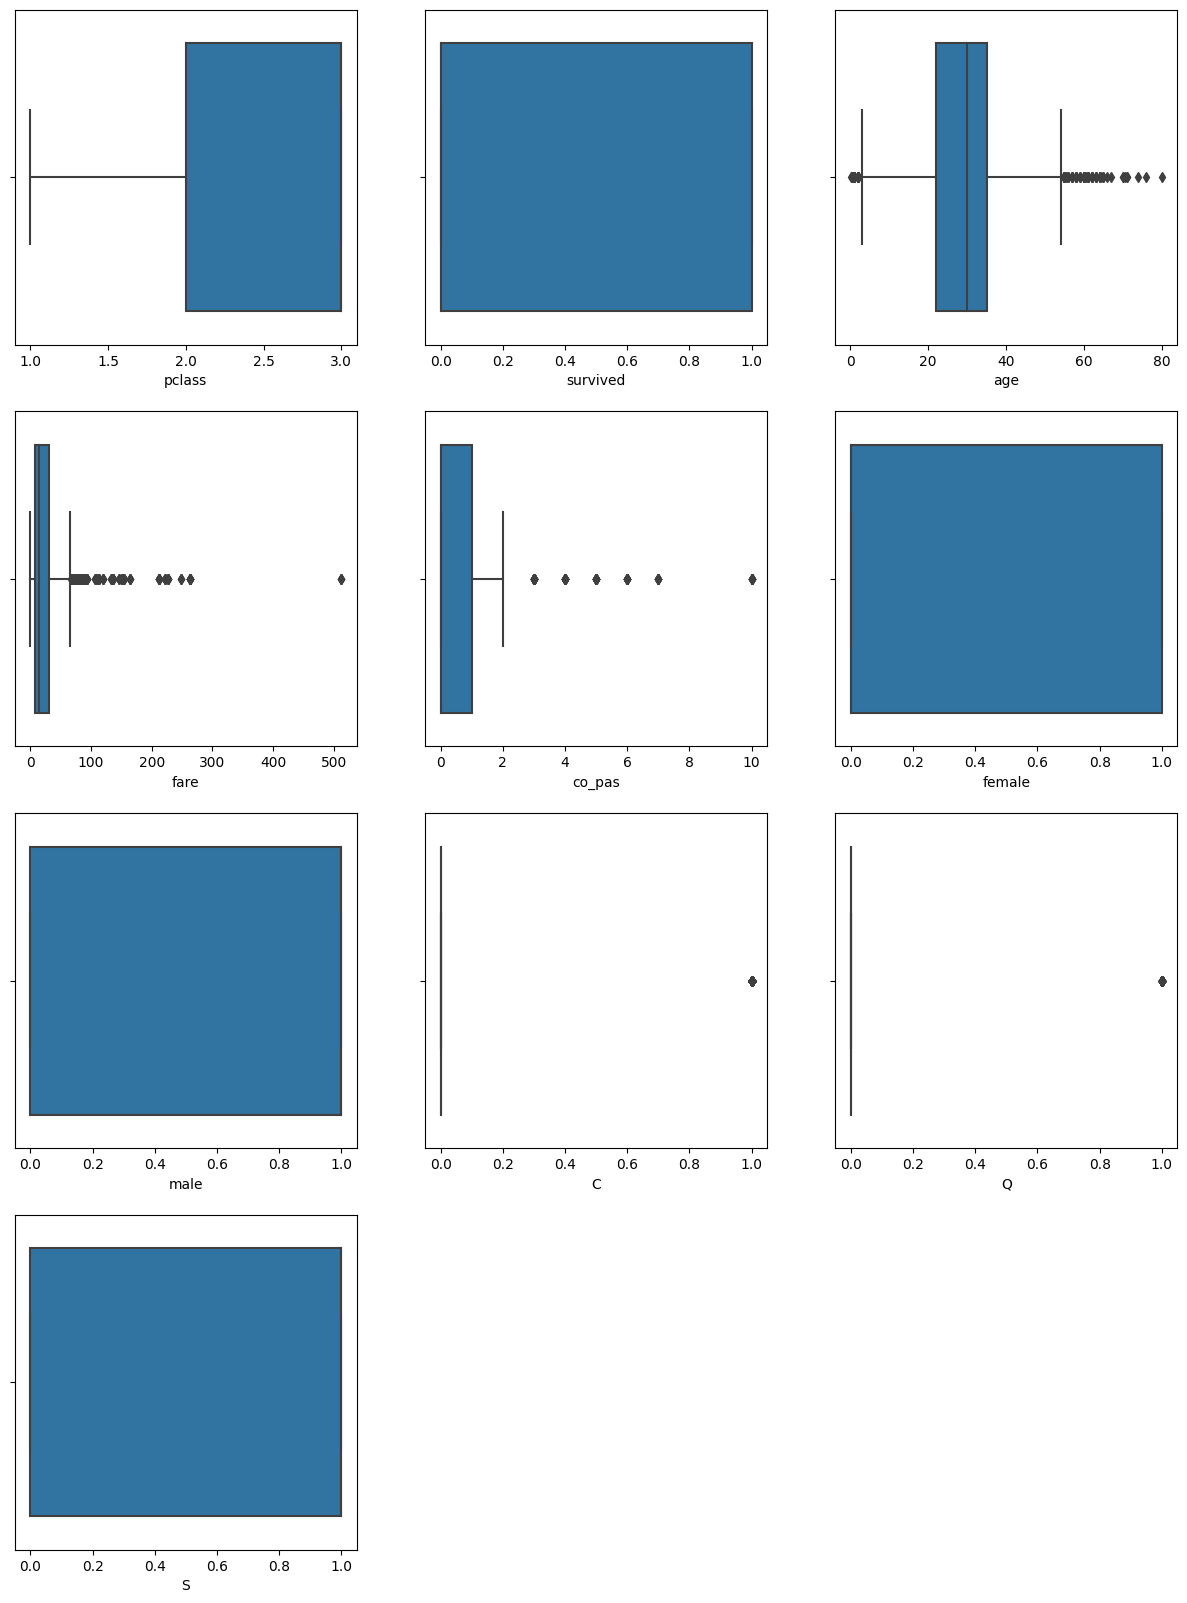

In [929]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
box(dataframe=df, columns=numeric_columns)

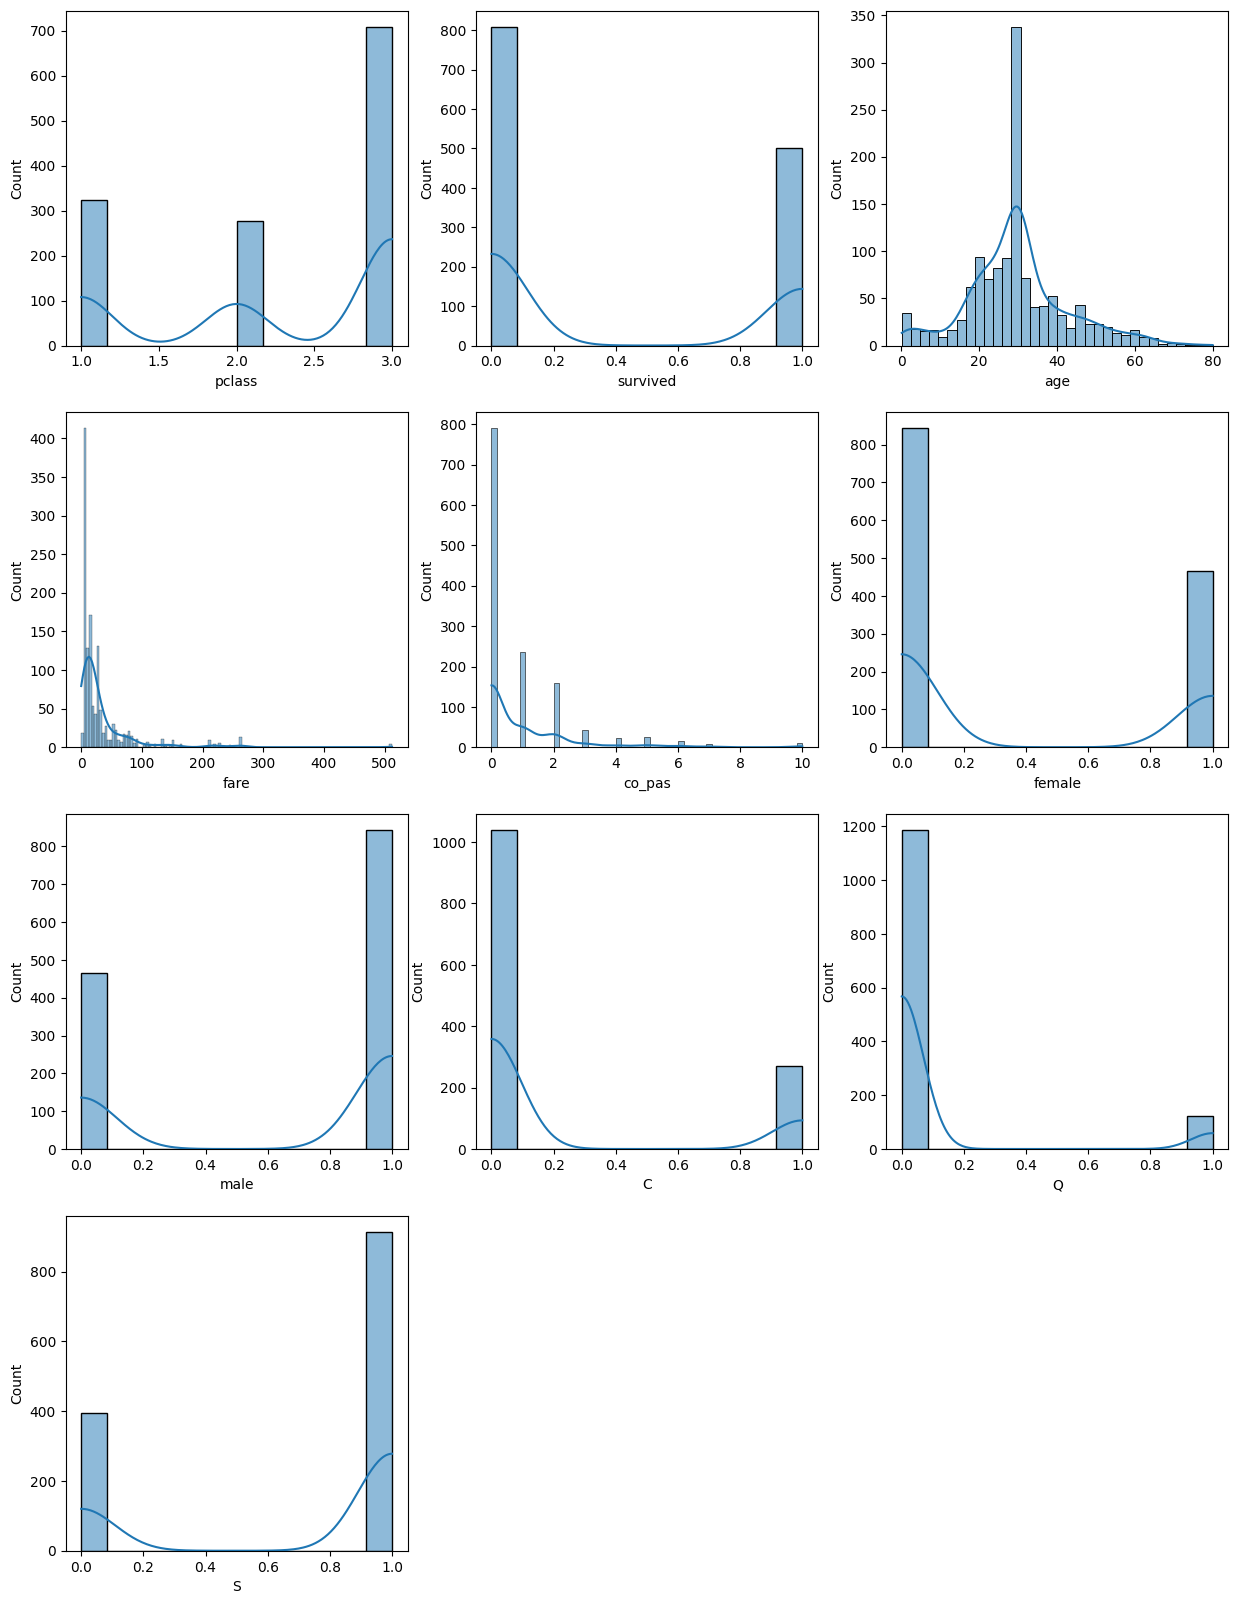

In [930]:
def histo(dataframe,columns):
    r = math.ceil(len(columns)/3)
    plt.figure(figsize=(15,5*r))
    i = 0
    for column in columns:
        i+=1
        plt.subplot(r,3,i)
        sns.histplot(data=dataframe,x=column,kde=True)
        
    plt.show()

histo(dataframe=df,columns=df.columns);

## Algorithms

### Transform train dataset

In [931]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   float64
 3   fare      1308 non-null   float64
 4   co_pas    1309 non-null   int64  
 5   female    1309 non-null   int64  
 6   male      1309 non-null   int64  
 7   C         1309 non-null   int64  
 8   Q         1309 non-null   int64  
 9   S         1309 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 102.4 KB


In [932]:
df.isnull().sum()
# remove rows with missing values in the fare column
df = df.dropna(subset=['fare'])


In [933]:
X = df.drop(columns=['survived'])
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [934]:
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


### Decision Trees

In [935]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(random_state=1)

In [936]:
y_pred = clf.predict(X_test)


Accuracy: 0.7889908256880734
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       205
           1       0.70      0.75      0.73       122

    accuracy                           0.79       327
   macro avg       0.77      0.78      0.78       327
weighted avg       0.79      0.79      0.79       327



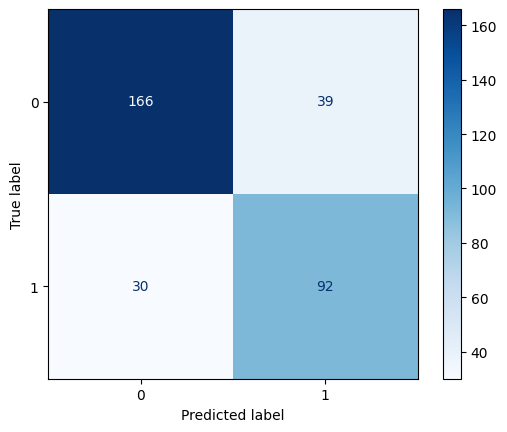

In [937]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.show()


In [938]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    "ccp_alpha": [0, 0],
    "class_weight": [{0: 1, 1: 2}],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 8, 11, 14, 17, 20],
    'max_features': [7, 8, 9, 10, 11]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter_grid, cv=10)
grid_search.fit(X_train_smote, y_train_smote)

print('Best score:', grid_search.best_score_)
print('Best parameters:', grid_search.best_params_)


Best score: 0.8202134986225896
Best parameters: {'ccp_alpha': 0, 'class_weight': {0: 1, 1: 2}, 'criterion': 'log_loss', 'max_depth': 11, 'max_features': 7, 'splitter': 'random'}


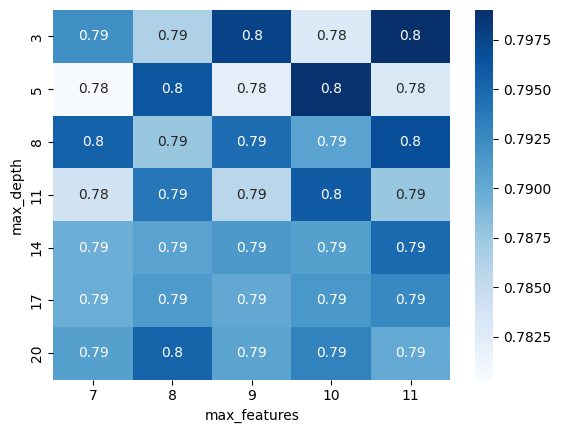

In [939]:
# Visualize the grid search results for the best parameter combination
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Reshape the mean_test_scores to visualize the grid search results
mean_test_scores_reshaped = mean_test_scores.reshape(
    len(parameter_grid['ccp_alpha']),
    len(parameter_grid['class_weight']),
    len(parameter_grid['criterion']),
    len(parameter_grid['splitter']),
    len(parameter_grid['max_depth']),
    len(parameter_grid['max_features'])
)
# Summarize across the criteria and splitter dimensions
mean_test_scores_agg = mean_test_scores_reshaped.mean(axis=(0, 1, 2, 3))

sns.heatmap(mean_test_scores_agg, cmap='Blues', annot=True)
plt.xticks(np.arange(len(parameter_grid['max_features'])) + 0.5, parameter_grid['max_features'])
plt.yticks(np.arange(len(parameter_grid['max_depth'])) + 0.5, parameter_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.show()


Accuracy: 0.7920489296636085
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       205
           1       0.69      0.80      0.74       122

    accuracy                           0.79       327
   macro avg       0.78      0.79      0.78       327
weighted avg       0.80      0.79      0.79       327



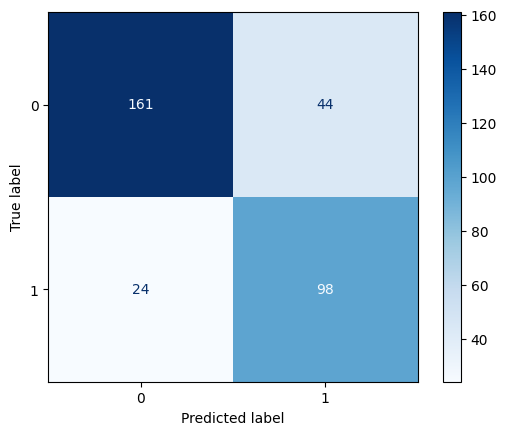

In [940]:
# Evaluate the best model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_smote, y_train_smote)
y_pred_best = best_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm_best).plot(cmap='Blues')
plt.show()

### Random Forest

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END

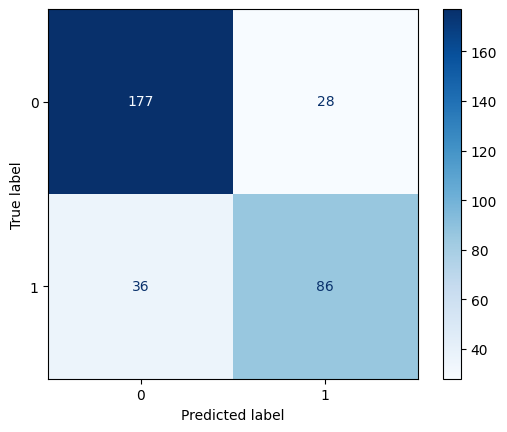

In [941]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize and train the model using GridSearchCV
rf = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_smote, y_train_smote)

# Best parameters and score
print('Best score for Random Forest:', grid_search_rf.best_score_)
print('Best parameters for Random Forest:', grid_search_rf.best_params_)

# Evaluate the best model
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_smote, y_train_smote)
y_pred_rf = best_rf.predict(X_test)

print("Accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap='Blues')
plt.show()


### XGBoost

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, 

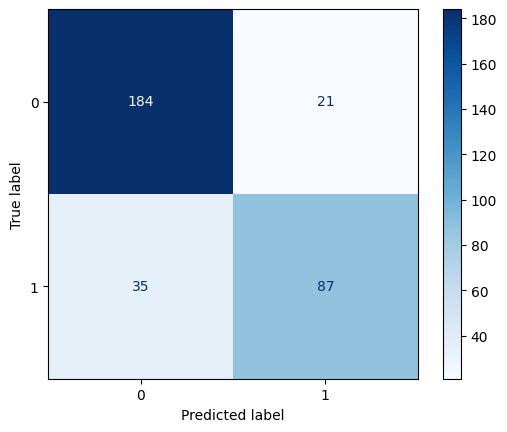

In [942]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize and train the model using GridSearchCV
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=1)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_smote, y_train_smote)

# Best parameters and score
print('Best score for XGBoost:', grid_search_xgb.best_score_)
print('Best parameters for XGBoost:', grid_search_xgb.best_params_)

# Evaluate the best model
best_xgb = grid_search_xgb.best_estimator_
best_xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb = best_xgb.predict(X_test)

print("Accuracy for XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot(cmap='Blues')
plt.show()
